In [1]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#Set the font family and size to use for Matplotlib figures
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

In [3]:
sympy.init_printing()

In [4]:
x=sympy.symbols('x')

In [5]:
x

In [6]:
5*x

In [7]:
x, nu, t = sympy.symbols('x nu t')
phi=(sympy.exp(-(x-4*t)**2/(4*nu*(t+1)))+sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1))))
phi

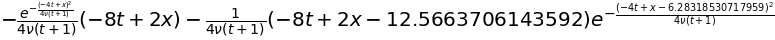

In [8]:
phiprime=phi.diff(x)
phiprime

In [9]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [10]:
from sympy.utilities.lambdify import lambdify

u=-2*nu*(phiprime/phi)+4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [13]:
u_lamb=lambdify((t,x,nu),u)
print('The value of u at t=1, x=4, nu=3 is {:.5f}'.format(u_lamb(1,4,3)))

The value of u at t=1, x=4, nu=3 is 3.49171


In [14]:
#Set parameters
nx=101 #number of spatial grid points
L=2.0*numpy.pi #length of the domain
dx = L/(nx-1) #Spatial grid size
nu = 0.07 #viscosity
nt = 100 #number of time steps to compute
sigma =0.1 #CFL limit
dt=sigma*dx**2/nu #time-step size

#Discretize the domain
x=numpy.linspace(0.0,L,num=nx)

In [15]:
#Set initial conditions.
t=0.0
u0=numpy.array([u_lamb(t,xi,nu) for xi in x])
u0

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

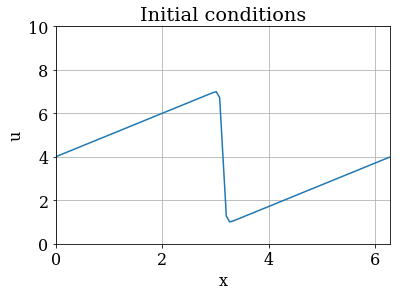

In [18]:
#Plot the initial conditions.
pyplot.figure(figsize=(6.0,4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x,u0)
pyplot.xlim(0.0,L)
pyplot.ylim(0.0,10.0);

In [21]:
#Integrate the Burgers' equation in time
u=u0.copy()
for n in range(nt):
    un=u.copy()
    #Update all interior points.
    u[1:-1]=(un[1:-1]-un[1:-1]*dt/dx*(un[1:-1]-un[:-2])+nu*dt/dx**2*(un[2:]-2*un[1:-1]+un[:-2]))
    #Update boundary points
    u[0]=(un[0]-u[0]*dt/dx*(un[0]-un[-1])+nu*dt/dx**2*(un[1]-2*un[0]+un[-1]))
    u[-1]=(un[-1]-un[-1]*dt/dx*(un[-1]-un[-2])+nu*dt/dx**2*(un[0]-2*un[-1]+un[-2]))

In [22]:
#Compute the analytical solution.
u_analytical=numpy.array([u_lamb(nt*dt, xi, nu) for xi in x])

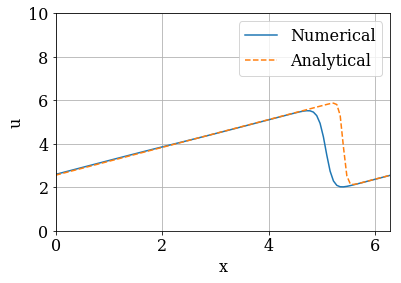

In [24]:
#Plot the numerical solution along with the analytical solution.
pyplot.figure(figsize=(6.0,4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x,u,label='Numerical')
pyplot.plot(x,u_analytical, label='Analytical', linestyle='--')
pyplot.legend()
pyplot.xlim(0.0,L)
pyplot.ylim(0.0,10.0);

In [25]:
from matplotlib import animation
from IPython.display import HTML

In [29]:
def burgers(u0,dx,dt,nu,nt=20):
    u_hist=[u0.copy()]
    u=u0.copy()
    for n in range(nt):
        un=u.copy()
        #Update all interior points.
        u[1:-1]=(un[1:-1]-un[1:-1]*dt/dx*(un[1:-1]-un[:-2])+nu*dt/dx**2*(un[2:]-2*un[1:-1]+un[:-2]))
        #Update boundary points
        u[0]=(un[0]-un[0]*dt/dx*(un[0]-un[-1])+nu*dt/dx**2*(un[1]-2*un[0]+un[-1]))
        u[-1]=(un[-1]-un[-1]*dt/dx*(un[-1]-un[-2])+nu*dt/dx**2*(un[0]-2*un[-1]+un[-2]))
        u_hist.append(u.copy())
    return u_hist

In [30]:
#Compute the history of the numerical solution
u_hist=burgers(u0,dx,dt,nu,nt=nt)

In [31]:
#Compute the history of the analytical solution.
u_analytical=[numpy.array([u_lamb(n*dt,xi,nu) for xi in x]) for n in range(nt)]

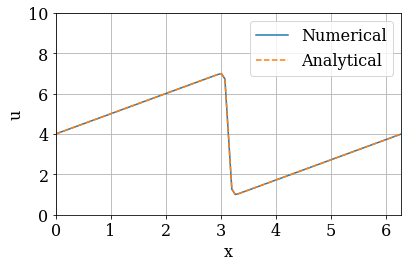

In [32]:
fig=pyplot.figure(figsize=(6.0,4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
u0_analytical=numpy.array([u_lamb(0.0,xi,nu) for xi in x])
line1=pyplot.plot(x,u0, label='Numerical')[0]
line2=pyplot.plot(x,u0_analytical,label='Analytical', linestyle='--')[0]
pyplot.legend()
pyplot.xlim(0.0,L)
pyplot.ylim(0.0,10.0)
fig.tight_layout()

In [33]:
def update_plot(n, u_hit, u_analytical):
    fig.suptitle('Time step {:0>2}'.format(n))
    line1.set_ydata(u_hist[n])
    line2.set_ydata(u_analytical[n])

In [34]:
#Create an animation
anim=animation.FuncAnimation(fig,update_plot,frames=nt, fargs=(u_hist,u_analytical), interval=100)

In [35]:
#Display the video.
HTML(anim.to_html5_video())

In [37]:
%%timeit
#Set initial conditions.
u=numpy.array([u_lamb(t,x0,nu) for x0 in x])
#Integrate in time using a nested for loop.
for n in range(nt):
    un=u.copy()
    #Update all interior points and the left boundary point.
    for i in range(nx-1):
        u[i]=(un[i]-un[i]*dt/dx*(un[i]-un[i-1])+nu*dt/dx**2*(un[i+1]-2*un[i]+un[i-1]))
    #Update the right boundary.
    u[-1]=(un[-1]-un[-1]*dt/dx*(un[-1]-un[-2])+nu*dt/dx**2*(un[0]-2*un[-1]+un[-2]))

20.5 ms ± 252 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
#Set initial conditions.
u=numpy.array([u_lamb(t,xi,nu) for xi in x])
#Integrate in time using array operations.
for n in range(nt):
    un=u.copy()
    #Update all interior points.
    u[1:-1]=(un[1:-1]-un[1:-1]*dt/dx*(un[1:-1]-un[:-2])+nu*dt/dx**2*(un[2:]-2*un[1:-1]+un[:-2]))
    #Update boundary points.
    u[0]=(un[0]-un[0]*dt/dx*(un[0]-un[-1])+nu*dt/dx**2*(un[1]-2*un[0]+un[-1]))
    u[-1]=(un[-1]-un[-1]*dt/dx*(un[-1]-un[-2]))